In [ ]:
#@title Mount Google Drive (You don't need to run this if you are running notebooks on your laptop)

from google.colab import drive

# The following command will prompt a URL for you to click and obtain the
# authorization code

drive.mount("/content/drive")

Mounted at /content/drive


# Biomarker Identification in Drug Development

## The Cancer Dependency Map project

The Cancer Dependency Map (DepMap) project is an umbrella project that aims to providing high quality genomic profilings of cancer cell lines (CCLE), their sensitivities to genetic perturbations (Achilies, DRIVE, DEMETER2, etc.), and their sensitivities to small molecule perturbations (PRISM). Mining these data allows us to better understand cancer biology, and potentially discover new genes for targeted therapies. 

### Cell line annotation file

Each cancer cell line is derived from a tumor. Knowing the information from the source of the cell line sometimes could help the drug developers identify the indications of interest by answering questions like: in which cancer types are BRCA1 / BRCA2 mutations most prevalent?

You can find the cell line sample info from DepMap in the shared google drive here:|

[sample_info.csv]

Now let's load it and do some simple manipulation.

In [ ]:
# Set data file location
# If you are running notebooks on your laptop, change this to the directory
# where you put downloaded files

from pathlib import Path

DATA = Path("/content/drive/My Drive/2022 ECBM E4060/data/2022-10-24")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("max.columns", 100)
pd.set_option("max.rows", 100)

In [ ]:
annot = pd.read_csv(DATA / "sample_info.csv")
annot.head()

,DepMap_ID,cell_line_name,stripped_cell_line_name,CCLE_Name,alias,COSMICID,sex,source,Achilles_n_replicates,cell_line_NNMD,culture_type,culture_medium,cas9_activity,RRID,WTSI_Master_Cell_ID,sample_collection_site,primary_or_metastasis,primary_disease,Subtype,age,Sanger_Model_ID,depmap_public_comments,lineage,lineage_subtype,lineage_sub_subtype,lineage_molecular_subtype
0,ACH-000001,NIH:OVCAR-3,NIHOVCAR3,NIHOVCAR3_OVARY,OVCAR3,905933.0,Female,ATCC,NaN,NaN,NaN,NaN,NaN,CVCL_0465,2201.0,ascites,Metastasis,Ovarian Cancer,"Adenocarcinoma, high grade serous",60,SIDM00105,NaN,ovary,ovary_adenocarcinoma,high_grade_serous,NaN
1,ACH-000002,HL-60,HL60,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,905938.0,Female,ATCC,NaN,NaN,NaN,NaN,NaN,CVCL_0002,55.0,haematopoietic_and_lymphoid_tissue,Primary,Leukemia,"Acute Myelogenous Leukemia (AML), M3 (Promyelo...",35,SIDM00829,NaN,blood,AML,M3,NaN
2,ACH-000003,CACO2,CACO2,CACO2_LARGE_INTESTINE,"CACO2, CaCo-2",NaN,Male,ATCC,NaN,NaN,NaN,NaN,NaN,CVCL_0025,NaN,Colon,NaN,Colon/Colorectal Cancer,Adenocarcinoma,NaN,SIDM00891,NaN,colorectal,colorectal_adenocarcinoma,NaN,NaN
3,ACH-000004,HEL,HEL,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,907053.0,Male,DSMZ,2.0,-3.079202,Suspension,RPMI + 10% FBS,52.4,CVCL_0001,783.0,haematopoietic_and_lymphoid_tissue,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30,SIDM00594,NaN,blood,AML,M6,NaN
4,ACH-000005,HEL 92.1.7,HEL9217,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,Male,ATCC,2.0,-2.404409,Suspension,RPMI + 10% FBS,86.6,CVCL_2481,NaN,bone_marrow,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30,SIDM00593,NaN,blood,AML,M6,NaN


In [ ]:
annot[annot.stripped_cell_line_name.str.lower() == "hela"]

,DepMap_ID,cell_line_name,stripped_cell_line_name,CCLE_Name,alias,COSMICID,sex,source,Achilles_n_replicates,cell_line_NNMD,culture_type,culture_medium,cas9_activity,RRID,WTSI_Master_Cell_ID,sample_collection_site,primary_or_metastasis,primary_disease,Subtype,age,Sanger_Model_ID,depmap_public_comments,lineage,lineage_subtype,lineage_sub_subtype,lineage_molecular_subtype
1084,ACH-001086,NaN,HELA,HELA_CERVIX,HeLa,1298134.0,Female,ATCC,NaN,NaN,NaN,NaN,NaN,CVCL_0030,1799.0,cervix,NaN,Cervical Cancer,Carcinoma,NaN,SIDM00846,NaN,cervix,cervical_carcinoma,NaN,NaN


In [ ]:
annot.groupby("primary_disease").size().sort_values(ascending=False)

primary_disease
Lung Cancer                   337
Skin Cancer                   282
Brain Cancer                  248
Leukemia                      197
Lymphoma                      152
Colon/Colorectal Cancer       137
Sarcoma                       119
Breast Cancer                 119
Ovarian Cancer                112
Bone Cancer                   112
Head and Neck Cancer           96
Gastric Cancer                 92
Neuroblastoma                  87
Pancreatic Cancer              84
Engineered                     83
Kidney Cancer                  79
Esophageal Cancer              77
Endometrial/Uterine Cancer     52
Myeloma                        48
Unknown                        48
Bile Duct Cancer               46
Fibroblast                     44
Bladder Cancer                 40
Liver Cancer                   32
Non-Cancerous                  29
Eye Cancer                     29
Rhabdoid                       27
Cervical Cancer                26
Thyroid Cancer                 2

In [ ]:
# Get cell line count for each site and histology
annot.groupby(["lineage", "lineage_subtype"]).size()

lineage         lineage_subtype            
adrenal_cortex  adrenal_carcinoma               2
bile_duct       cholangiocarcinoma             46
                gallbladder_adenocarcinoma     11
blood           ALL                            69
                AML                            73
                                               ..
uterus          endometrial_squamous            3
                endometrial_stromal_sarcoma     1
                mullerian_carcinoma             1
                uterine_carcinosarcoma          2
                uterus_mixed                    1
Length: 128, dtype: int64

### Drug sensitivity data

Profiling Relative Inhibition Simultaneously in Mixtures, or [PRISM](https://www.theprismlab.org/), project within DepMap uses high-throughput multiplexed screening on hundreds of human cancer cell lines. It allows researchers to validate the mechanisms of action (MoA) of drugs, or identify potential novel targets of existing drugs for drug repurposing. You can find the screening data from PRISM here:

[secondary-screen-dose-response-curve-parameters.csv]

In [ ]:
prism = pd.read_csv(DATA / "secondary-screen-dose-response-curve-parameters.csv")
prism.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,broad_id,depmap_id,ccle_name,screen_id,upper_limit,lower_limit,slope,r2,auc,ec50,ic50,name,moa,target,disease.area,indication,smiles,phase,passed_str_profiling,row_name
0,BRD-K71847383-001-12-5,ACH-000879,MFE296_ENDOMETRIUM,HTS002,1,2.122352,-0.022826,-0.026964,1.677789,8.415093e+06,NaN,cytarabine,ribonucleotide reductase inhibitor,"POLA1, POLB, POLD1, POLE",hematologic malignancy,"acute lymphoblastic leukemia (ALL), chronic ly...",Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,Launched,True,ACH-000879
1,BRD-K71847383-001-12-5,ACH-000320,PSN1_PANCREAS,HTS002,1,1.325174,-0.237504,-0.147274,1.240300,9.643742e+00,NaN,cytarabine,ribonucleotide reductase inhibitor,"POLA1, POLB, POLD1, POLE",hematologic malignancy,"acute lymphoblastic leukemia (ALL), chronic ly...",Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,Launched,True,ACH-000320
2,BRD-K71847383-001-12-5,ACH-001145,OC316_OVARY,HTS002,1,2.089350,-0.302937,0.193893,1.472333,2.776687e-02,NaN,cytarabine,ribonucleotide reductase inhibitor,"POLA1, POLB, POLD1, POLE",hematologic malignancy,"acute lymphoblastic leukemia (ALL), chronic ly...",Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,Launched,True,ACH-001145
3,BRD-K71847383-001-12-5,ACH-000873,KYSE270_OESOPHAGUS,HTS002,1,1.311820,-0.209393,-0.005460,1.207160,2.654701e+00,NaN,cytarabine,ribonucleotide reductase inhibitor,"POLA1, POLB, POLD1, POLE",hematologic malignancy,"acute lymphoblastic leukemia (ALL), chronic ly...",Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,Launched,True,ACH-000873
4,BRD-K71847383-001-12-5,ACH-000855,KYSE150_OESOPHAGUS,HTS002,1,1.369799,-0.277530,0.132818,1.229332,5.889041e-01,NaN,cytarabine,ribonucleotide reductase inhibitor,"POLA1, POLB, POLD1, POLE",hematologic malignancy,"acute lymphoblastic leukemia (ALL), chronic ly...",Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,Launched,True,ACH-000855


In this dataset, each row is a cellline-drug pair, where `depmap_id` column indicates the cellline ID as in the cellline info table above. The compound (drug) name can be found in the `name` column. If the molecule is designed to target a certain gene, it will be annotated in the `target` and `moa` columns. This allows us to investigate how inhibition of a certain pathway affect the viability of cancer cell lines with a certain mutation profiles.




### Biomarker identification -- target gene

To unerstand the potential target subpopulation of a drug, the easiest path is to follow the biology. The goal is to find in which subpopulation (with specific genomic feature such as mutations, copy number variation, or over / under expression), the drug will have the highest potency. We'll take EGFR inhibitor Erlotinib for example. 

[Erlotinib](https://en.wikipedia.org/wiki/Erlotinib) is a compound targeting [epidermal growth factor receptor](https://en.wikipedia.org/wiki/Epidermal_growth_factor_receptor), or EGFR. In multiple cancer types such as lung cancer and pancreatic cancer, EGFR is often mutated and thus leads to EGFR overexpression and uncontrolled growth of the cells. We expects to see an increased sensitivity of the drug in cell liens with these genomic profiles.

You can download the expression profiles and mutation information here:

[CCLE_expression.csv]

[CCLE_mutations.csv]

Let's first check the correlation between the activity area of Erlotinib with the EGFR mutations in cell lines.

In [ ]:
# load maf file, note we explicitly convert a few columns to boolean
maf = pd.read_csv(DATA / "CCLE_mutations.csv")

maf.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,19,22,27,28,29,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Hugo_Symbol,Entrez_Gene_Id,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,dbSNP_RS,dbSNP_Val_Status,Genome_Change,Annotation_Transcript,DepMap_ID,cDNA_Change,Codon_Change,Protein_Change,isDeleterious,isTCGAhotspot,TCGAhsCnt,isCOSMIChotspot,COSMIChsCnt,ExAC_AF,Variant_annotation,CGA_WES_AC,HC_AC,RD_AC,RNAseq_AC,SangerWES_AC,WGS_AC
0,VPS13D,55187,37,1,12359347,12359347,+,Nonsense_Mutation,SNP,C,A,NaN,NaN,g.chr1:12359347C>A,ENST00000358136.3,ACH-000001,c.6122C>A,c.(6121-6123)tCa>tAa,p.S2041*,True,False,NaN,False,0.0,NaN,damaging,34:213,NaN,NaN,NaN,34:221,NaN
1,AADACL4,343066,37,1,12726308,12726322,+,In_Frame_Del,DEL,CTGGCGTGACGCCAT,-,rs58218425|rs139261871|rs369427733|rs560787141,byFrequency,g.chr1:12726308_12726322delCTGGCGTGACGCCAT,ENST00000376221.1,ACH-000001,c.786_800delCTGGCGTGACGCCAT,c.(784-801)tcctggcgtgacgccatc>tcc,p.WRDAI263del,False,False,NaN,False,3.0,NaN,other non-conserving,57:141,NaN,NaN,NaN,9:0,28:32
2,IFNLR1,163702,37,1,24484172,24484172,+,Silent,SNP,G,A,NaN,NaN,g.chr1:24484172G>A,ENST00000327535.1,ACH-000001,c.1011C>T,c.(1009-1011)ggC>ggT,p.G337G,False,False,NaN,False,0.0,NaN,silent,118:0,NaN,NaN,10:0,118:0,18:0
3,TMEM57,55219,37,1,25785018,25785019,+,Frame_Shift_Ins,INS,-,A,NaN,NaN,g.chr1:25785018_25785019insA,ENST00000374343.4,ACH-000001,c.789_790insA,c.(790-792)aaafs,p.K264fs,True,False,0.0,False,0.0,NaN,damaging,NaN,NaN,NaN,6:28,NaN,NaN
4,ZSCAN20,7579,37,1,33954141,33954141,+,Missense_Mutation,SNP,T,G,NaN,NaN,g.chr1:33954141T>G,ENST00000361328.3,ACH-000001,c.494T>G,c.(493-495)gTg>gGg,p.V165G,False,False,NaN,False,0.0,NaN,other non-conserving,28:62,NaN,NaN,NaN,27:61,NaN


The MAF file uses slightly different annotation from the ones from TCGA as we dealt with before. Here the quality check has already been done (like we did the `FILTER==PASS` before), and instead of `IMPACT` column they used several one algorithm to annotate whether the mutation is deleterious in the `isDeleterious` column, and another to annotate whether the mutation is damagin in column `Variant_annotation`. We'll use a union of the two, plus what's annotated as `isCOSMIChotspot`. The `isCOSMIChotspot` column indicates whether this mutation has been observed as a mutation hotspot in the [`COSMIC`](https://cancer.sanger.ac.uk/cosmic) database. The hotspot mutations are frequently observed in tumors, usually indicating there are some evolutionary advantage that these mutations are given to the cancer cells. We will try to see if the EGFR inhibitor has suppressing effect on cancer cell lines that harboring these EGFR mutations.

In [ ]:
egfr = maf[(maf.Hugo_Symbol == "EGFR") &
           (maf.isDeleterious | (maf.Variant_annotation == "damaging") | maf.isCOSMIChotspot)]

In [ ]:
egfr

,Hugo_Symbol,Entrez_Gene_Id,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,dbSNP_RS,dbSNP_Val_Status,Genome_Change,Annotation_Transcript,DepMap_ID,cDNA_Change,Codon_Change,Protein_Change,isDeleterious,isTCGAhotspot,TCGAhsCnt,isCOSMIChotspot,COSMIChsCnt,ExAC_AF,Variant_annotation,CGA_WES_AC,HC_AC,RD_AC,RNAseq_AC,SangerWES_AC,WGS_AC
3306,EGFR,1956,37,7,55242466,55242480,+,In_Frame_Del,DEL,GAATTAAGAGAAGCA,-,rs121913438|rs121913439|rs397517099|rs39751709...,NaN,g.chr7:55242466_55242480delGAATTAAGAGAAGCA,ENST00000455089.1,ACH-000012,c.2101_2115delGAATTAAGAGAAGCA,c.(2101-2115)gaattaagagaagcadel,p.ELREA701del,False,True,8.0,True,1571.0,NaN,other non-conserving,239:73,966:51,NaN,161:72,37:0,521:151
9521,EGFR,1956,37,7,55242466,55242480,+,In_Frame_Del,DEL,GAATTAAGAGAAGCA,-,rs121913438|rs121913439|rs397517099|rs39751709...,NaN,g.chr7:55242466_55242480delGAATTAAGAGAAGCA,ENST00000455089.1,ACH-000029,c.2101_2115delGAATTAAGAGAAGCA,c.(2101-2115)gaattaagagaagcadel,p.ELREA701del,False,True,8.0,True,1571.0,NaN,other non-conserving,1951:337,NaN,NaN,206:52,NaN,NaN
10022,EGFR,1956,37,7,55242465,55242479,+,In_Frame_Del,DEL,GGAATTAAGAGAAGC,-,rs121913438|rs121913439|rs397517099|rs39751709...,NaN,g.chr7:55242465_55242479delGGAATTAAGAGAAGC,ENST00000455089.1,ACH-000030,c.2100_2114delGGAATTAAGAGAAGC,c.(2098-2115)aaggaattaagagaagca>aaa,p.ELREA701del,False,True,13.0,True,1576.0,NaN,other non-conserving,28:35,28:10,NaN,161:59,39:0,73:19
10955,EGFR,1956,37,7,55242465,55242479,+,In_Frame_Del,DEL,GGAATTAAGAGAAGC,-,rs121913438|rs121913439|rs397517099|rs39751709...,NaN,g.chr7:55242465_55242479delGGAATTAAGAGAAGC,ENST00000455089.1,ACH-000035,c.2100_2114delGGAATTAAGAGAAGC,c.(2098-2115)aaggaattaagagaagca>aaa,p.ELREA701del,False,True,13.0,True,1576.0,NaN,other non-conserving,27:57,77:102,NaN,69:137,27:0,35:33
20996,EGFR,1956,37,7,55221822,55221822,+,Missense_Mutation,SNP,C,A,rs149840192,NaN,g.chr7:55221822C>A,ENST00000455089.1,ACH-000067,c.731C>A,c.(730-732)gCc>gAc,p.A244D,False,True,28.0,True,23.0,NaN,other non-conserving,29:48,47:141,NaN,107:256,28:49,NaN
40727,EGFR,1956,37,7,55242465,55242466,+,Frame_Shift_Del,DEL,GG,-,rs121913422|rs121913421|rs397517094|rs12191342...,NaN,g.chr7:55242465_55242466delGG,ENST00000275493.2,ACH-000150,c.2235_2236delGG,c.(2233-2238)aaggaafs,p.E746fs,True,True,13.0,True,1560.0,NaN,damaging,NaN,NaN,NaN,41:180,NaN,NaN
40728,EGFR,1956,37,7,55242470,55242485,+,Frame_Shift_Del,DEL,TAAGAGAAGCAACATC,-,rs397517100|rs121913438|rs121913439|rs39751709...,NaN,g.chr7:55242470_55242485delTAAGAGAAGCAACATC,ENST00000275493.2,ACH-000150,c.2240_2255delTAAGAGAAGCAACATC,c.(2239-2256)ttaagagaagcaacatctfs,p.LREATS747fs,True,False,0.0,True,2229.0,NaN,damaging,NaN,NaN,NaN,41:232,NaN,NaN
47638,EGFR,1956,37,7,55242470,55242487,+,In_Frame_Del,DEL,TAAGAGAAGCAACATCTC,-,rs397517100|rs121913438|rs121913439|rs39751709...,NaN,g.chr7:55242470_55242487delTAAGAGAAGCAACATCTC,ENST00000275493.2,ACH-000176,c.2240_2257delTAAGAGAAGCAACATCTC,c.(2239-2259)ttaagagaagcaacatctccg>tcg,p.747_753LREATSP>S,False,False,0.0,True,2232.0,NaN,other non-conserving,NaN,37:101,NaN,73:314,12:0,NaN
47639,EGFR,1956,37,7,55242494,55242494,+,Missense_Mutation,SNP,C,A,rs121913463|rs397517100|rs397517099,NaN,g.chr7:55242494C>A,ENST00000275493.2,ACH-000176,c.2264C>A,c.(2263-2265)gCc>gAc,p.A755D,False,False,0.0,True,41.0,NaN,other non-conserving,NaN,36:83,NaN,NaN,NaN,NaN
199965,EGFR,1956,37,7,55249071,55249071,+,Missense_Mutation,SNP,C,T,rs121434569,NaN,g.chr7:55249071C>T,ENST00000455089.1,ACH-000587,c.2234C>T,c.(2233-2235)aCg>aTg,p.T745M,False,False,NaN,True,109.0,0.000041,other non-conserving,103:30,398:147,NaN,368:114,105:30,40:8


To extract the drug screening result. Note for Erlotinib there are two `screen_id` representing different screening set. We'll use `screen_id == "HTS002"` as it contains more cell lines.

In [ ]:
plotdata = prism[
    (prism.screen_id == "HTS002") &
    (prism.passed_str_profiling) & 
    (prism.name == "erlotinib") & 
    prism.depmap_id.isin(set(maf.DepMap_ID))
][
    ["depmap_id", "auc", "ec50", "ic50",]
].copy()

plotdata["EGFR_mut"] = False
plotdata.loc[plotdata.depmap_id.isin(set(egfr.DepMap_ID)), "EGFR_mut"] = True

In [ ]:
# there are some outliers of EC50 that has extremely high values. We'll set an
# upper limit to them
plotdata.loc[plotdata.ec50 > 10, "ec50"] = 10

In [ ]:
plotdata.head()

,depmap_id,auc,ec50,ic50,EGFR_mut
37303,ACH-000879,0.778186,0.481569,0.603944,False
37304,ACH-000320,1.421381,0.378348,NaN,False
37305,ACH-001145,1.096977,0.009129,NaN,False
37306,ACH-000873,0.775731,0.556030,0.767366,True
37307,ACH-000855,0.749209,0.365400,0.594647,False


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(1, 1.6, 'M-W U P-value = 0.0387')

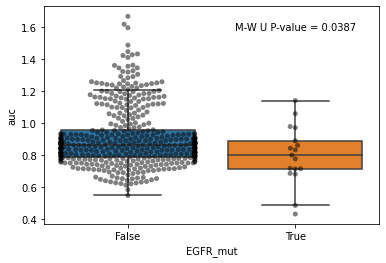

In [ ]:
from scipy.stats import mannwhitneyu
import seaborn as sns

mwu, pval = mannwhitneyu(plotdata.loc[plotdata.EGFR_mut, "auc"],
                         plotdata.loc[~plotdata.EGFR_mut, "auc"])
ax = sns.boxplot(x="EGFR_mut", y="auc", data=plotdata, fliersize=0)
ax = sns.swarmplot(x="EGFR_mut", y="auc", data=plotdata, color="k",
                  alpha=0.5, ax=ax)

ax.text(1, 1.6, "M-W U P-value = {}".format(np.round(pval, 4)), ha="center", va="center")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(1, 8, 'M-W U P-value = 0.2233')

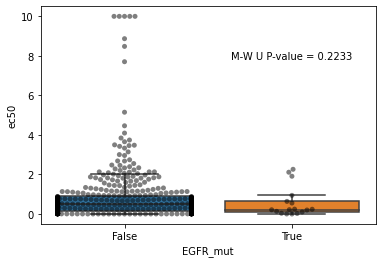

In [ ]:
from scipy.stats import mannwhitneyu
import seaborn as sns

mwu, pval = mannwhitneyu(plotdata.loc[plotdata.EGFR_mut, "ec50"],
                         plotdata.loc[~plotdata.EGFR_mut, "ec50"])
ax = sns.boxplot(x="EGFR_mut", y="ec50", data=plotdata, fliersize=0)
ax = sns.swarmplot(x="EGFR_mut", y="ec50", data=plotdata, color="k",
                  alpha=0.5, ax=ax)
ax.text(1, 8, "M-W U P-value = {}".format(np.round(pval, 4)), ha="center", va="center")

We see the distribution of area under curve (auc, which is the inverse of activity area) and EC50 for the EGFR mut cell lines is lower than the EGFR wild type cell lines. Next, let's see if we can further discriminate the celllines by including the gene expression data.

In [ ]:
ge = pd.read_csv(DATA / "CCLE_expression.csv", index_col=0)

# remove entrez ID from gene names
ge.columns = [x.split(" (")[0] for x in ge.columns]

In [ ]:
ge.head()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,NIPAL3,LAS1L,ENPP4,SEMA3F,CFTR,ANKIB1,CYP51A1,KRIT1,RAD52,BAD,LAP3,CD99,HS3ST1,AOC1,WNT16,HECW1,MAD1L1,LASP1,SNX11,TMEM176A,M6PR,KLHL13,CYP26B1,ICA1,DBNDD1,ALS2,CASP10,CFLAR,TFPI,NDUFAF7,RBM5,MTMR7,SLC7A2,ARF5,SARM1,POLDIP2,PLXND1,AK2,CD38,...,FAM240A,FAM95C,LITAFD,PRRT1B,BX276092.9,ETDC,LMLN2,MYOCOS,HSFX3,VSIG10L2,PRSS50,CPHXL,AC131160.1,TPTEP2-CSNK1E,GNG14,SLURP2,AC069544.2,SCO2,C2orf81,PERCC1,THSD8,LYNX1-SLURP2,OR8B3,OR4F16,OR8B2,TMEM247,SMIM38,OR8S1,OR4F29,EEF1AKMT4,AC022414.1,TBCE,SMIM41,AC008397.1,GCSAML-AS1,CCDC39,EEF1AKMT4-ECE2,AP000812.4,UPK3BL2,AC093512.2,ARHGAP11B,AC004593.2,AC090517.4,AL160269.1,ABCF2-H2BE1,POLR2J3,H2BE1,AL445238.1,GET1-SH3BGR,AC113348.1
ACH-001113,4.990501,0.000000,7.273702,2.765535,4.480265,0.028569,1.269033,3.058316,6.483171,5.053980,3.456806,4.415488,4.766595,2.280956,3.237258,0.000000,5.125982,6.636770,5.638364,3.881665,5.156639,4.775051,5.904966,0.097611,0.111031,0.042644,2.847997,3.336283,5.371210,4.313971,0.000000,7.536830,5.207893,2.965323,1.922198,2.049631,4.478972,2.077243,5.101818,0.056584,4.614710,5.286142,0.545968,1.613532,7.381197,2.611172,5.929081,5.293885,6.730640,0.176323,...,0.0,2.724650,0.042644,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.748461,0.042644,1.782409,0.356144,0.650765,0.411426,2.895303,0.765535,1.731183,0.056584,0.695994,0.070389,0.0,0.070389,0.0,0.0,0.389567,0.0,0.070389,4.578335,0.000000,5.761019,0.0,0.000000,0.0,0.028569,0.000000,1.464668,5.234961,4.139961,1.214125,0.000000,0.111031,0.150560,1.427606,5.781884,0.0,0.000000,0.799087,0.000000
ACH-001289,5.209843,0.545968,7.070604,2.538538,3.510962,0.000000,0.176323,3.836934,4.200850,3.832890,1.910733,3.374344,4.861955,3.625270,1.275007,0.028569,5.177121,7.130313,5.061776,3.023255,5.542258,6.305423,6.641546,0.084064,0.014355,0.275007,0.189034,2.903038,4.955127,4.421560,0.042644,7.133091,2.861955,0.124328,3.513491,4.056584,4.286142,0.333424,4.520422,0.070389,3.987321,6.192391,3.163499,2.185867,7.792530,2.427606,6.269407,3.785551,7.327059,0.137504,...,0.0,0.918386,0.000000,0.042644,0.000000,0.0,0.0,0.000000,0.111031,0.0,0.000000,0.000000,1.799087,0.526069,0.000000,0.000000,4.202418,0.298658,0.765535,0.000000,4.173927,0.189034,0.0,0.014355,0.0,0.0,0.028569,0.0,0.014355,2.182692,0.042644,5.771357,0.0,0.000000,0.0,1.090853,0.000000,1.490570,0.941106,4.107688,1.835924,0.000000,0.310340,0.000000,0.807355,4.704319,0.0,0.000000,0.464668,0.070389
ACH-001339,3.779260,0.000000,7.346425,2.339137,4.254745,0.056584,1.339137,6.724241,3.671293,3.775051,2.895303,3.613532,4.300856,0.799087,0.275007,0.042644,4.149747,5.655352,4.858976,2.675816,4.560715,6.170125,8.182245,0.389567,0.084064,0.084064,0.084064,5.733625,6.274262,4.407353,0.214125,7.361417,0.137504,0.454176,2.301588,3.317594,3.746313,1.232661,4.750607,3.914565,3.723559,5.008541,0.545968,1.400538,6.864558,2.241840,6.123087,7.242793,8.119875,0.310340,...,0.0,0.000000,0.000000,0.000000,0.028569,0.0,0.0,0.028569,0.028569,0.0,0.014355,0.000000,0.992768,0.201634,0.000000,0.014355,3.209453,0.344828,0.555816,0.000000,2.952334,0.070389,0.0,0.014355,0.0,0.0,0.028569,0.0,0.014355,3.012569,0.000000,4.744699,0.0,0.000000,0.0,0.000000,0.000000,0.985500,1.124328,2.313246,1.823749,0.084064,0.176323,0.042644,1.384050,4.931683,0.0,0.028569,0.263034,0.000000
ACH-001538,5.726831,0.000000,7.086189,2.543496,3.102658,0.000000,5.914565,6.099716,4.475733,4.294253,2.472488,4.573496,5.314697,3.488001,2.980025,0.028569,3.872829,6.176921,3.714795,2.726831,5.565293,5.230357,6.811728,2.657640,0.084064,0.124328,0.367371,4.161888,6.703211,3.541019,0.070389,7.208478,0.014355,1.124328,3.946731,3.237258,2.931683,2.797013,4.591560,3.122673,3.554589,5.383359,0.111031,1.084064,7.403779,1.974529,5.444270,0.970854,7.954487,0.070389,...,0.0,0.641546,0.000000,0.000000,0.014355,0.0,0.0,0.028569,0.000000,0.0,0.000000,0.000000,0.641546,0.042644,0.000000,1.454176,2.438293,0.678072,1.117695,0.000000,0.000000,0.150560,0.0,0.000000,0.0,0.0,0.124328,0.0,0.000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


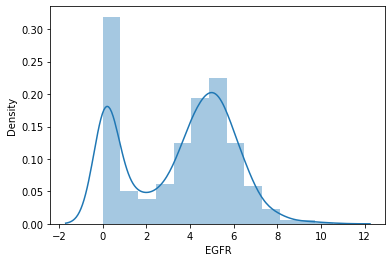

In [ ]:
ge_egfr = ge["EGFR"]

sns.distplot(ge_egfr)

From the distirbution plot, we can set a threshold at 6 to define if a cellline's EGFR is overexpressed.

In [ ]:
egfr_ovexp_samples = ge_egfr.index.values[(ge_egfr > 6)]

In [ ]:
# only keep celllines that exist in gene expression table
plotdata = plotdata[plotdata.depmap_id.isin(ge.index)]
plotdata["EGFR_ovexp"] = False
plotdata.loc[plotdata.depmap_id.isin(egfr_ovexp_samples), "EGFR_ovexp"] = True

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
plotdata["EGFR_ovexp_mut"] = (plotdata.EGFR_ovexp | plotdata.EGFR_mut)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(1, 1.6, 'M-W U P-value = 0.0042')

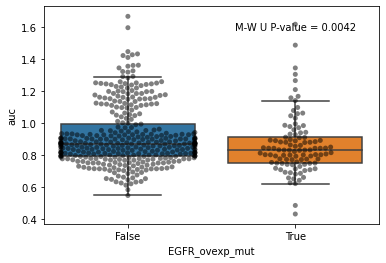

In [ ]:
from scipy.stats import mannwhitneyu
import seaborn as sns

mwu, pval = mannwhitneyu(plotdata.loc[plotdata.EGFR_ovexp_mut, "auc"],
                         plotdata.loc[~plotdata.EGFR_ovexp_mut, "auc"])
ax = sns.boxplot(x="EGFR_ovexp_mut", y="auc", data=plotdata, fliersize=0)
ax = sns.swarmplot(x="EGFR_ovexp_mut", y="auc", data=plotdata, color="k",
                  alpha=0.5, ax=ax)

ax.text(1, 1.6, "M-W U P-value = {}".format(np.round(pval, 4)), ha="center", va="center")

This is not better. The "overexpression" we defined traded recall for precision. It shows that there are definitely other factors contributes to the sensitivity to Erlotinib. Next we will try to see if there is any other biomarkers (_e.g._ gene expression or mutations) that can be further used to predict response.

### Biomarker identification -- machine learning

In the early [CCLE paper by Barretina _et al._](https://dx.doi.org/10.1038%2Fnature11003), the authors used elastic net to identify predictive biomarkers. This is where machine learning can be very powerful. The goal here is NOT to build a model to predict responses in cell lines, as there will only be very limited applications given the distinct genomic profiles between cell lines and tumor. Fitting a machine learning model to the data serves as an automatic data mining approach to identify useful predictive biomarkers.

In this section, we will try to use elastic net to build a predictive model and dig into the features selected by the model.

First, We need to create a feature set combining the expression and mutation data as the feature space to build the model from.

In [ ]:
# use the same criteria to include 
maf_nn = maf[(maf.isDeleterious | (maf.Variant_annotation == "damaging") | maf.isCOSMIChotspot.astype(bool))]
mut_mat = maf_nn.pivot_table(
    index="Hugo_Symbol", columns="DepMap_ID", values="Start_position",
    # the values can be anything, as we just want to convert it to number of mutations
    aggfunc=len, fill_value=0
)

# change the index name to indicate it's mutation, distinguishing them from expression
mut_mat.index = mut_mat.index.to_series() + "_mut"

With the mutation matrix in place, we can now create a feature matrix containing expression and mutation data for ML models to learn.

In [ ]:
# combine expression and mutation matrix, note we use inner join so we get the intersection of the samples
feat = pd.concat([ge, mut_mat.T], axis=1, join="inner").fillna(0)

feat.shape

(1373, 37312)

The target variable for our machine to learn is auc of the Erlotinib. 

In [ ]:
target = prism.loc[
    (prism.screen_id == "HTS002") & 
    (prism.passed_str_profiling) & 
    (prism.name == "erlotinib"),
    ["auc", "depmap_id"]
].set_index("depmap_id", drop=True)

In [ ]:
# find common samples
common_celllines = list(set(target.index) & set(feat.index))
target = target.loc[common_celllines]
feat = feat.loc[common_celllines]

In [ ]:
# make sure the names of feature and target variable match
np.all(feat.index == target.index)

True

## Use random forest as a feature selector

The [Barretina _et al._ paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3320027/) used an [`ElasticNet`](https://en.wikipedia.org/wiki/Elastic_net_regularization) model with 10-fold cross validation for feature selection. In fact, with the huge number of features we have, it is more efficient to use tree-based model as a feature selector. Among tree-based models, [`RandomForest`](https://en.wikipedia.org/wiki/Random_forest) has been a very popular and effective algorithm for quickly building baseline model or for feature selection. Here we will combine a `RandomForestRegressor` and a `SelectFromModel` module from `sklearn` to select predictive features.

In [ ]:
# keep only frequently-mutated genes in the dataset (1%)
feat = feat.loc[:, (feat != 0).sum(axis=0) > 5]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# fit a random forest regressor model, note we set random state for
# reproducibility
# NOTE this will take a while
feat_sel = SelectFromModel(
    RandomForestRegressor(random_state=4060)
).fit(feat, target)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


We can cross-check the coefficients of the model, and the `threshold_` attribute from the feature selector.

In [ ]:
feat_sel.threshold_

4.460502252553638e-05

Similarly, within the feature selector, there is an `estimator_` attribute that contains the fitted random forest model. The `feature_importance_` attribute contains information about the importance of each feature in the model. By cross-reference between the `threshold_` and the `feature_importance_` attributes, we can check how many features were selected.

In [ ]:
(feat_sel.estimator_.feature_importances_ > feat_sel.threshold_).sum()

2730

In [ ]:
feature_importance = pd.DataFrame({
    "feature": feat.columns,
    "importance": feat_sel.estimator_.feature_importances_
}).sort_values("importance", ascending=False)

Note this is NOT comprehensive enough. There are many factors you can adjust to pinpoint even more precise set of genes that can be used to further understand the mechanism of the drug.

However, to feel accomplished, we can plot the fitted predicted values by elastic net to compare with the real value. To compare it with our previous biomarker, we will observe the distribution of the predicted values and separate them into two groups.


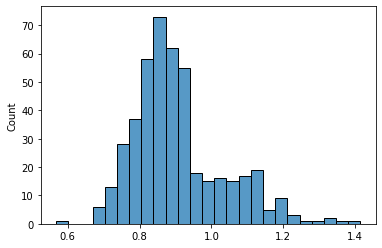

In [ ]:
y_pred = feat_sel.estimator_.predict(feat)

sns.histplot(y_pred)

We will set a threshold at `y_pred > 1` to separate the predicted responders vs non-responders.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 1.6, 'M-W U = [34016.] (P-value = [0.])')

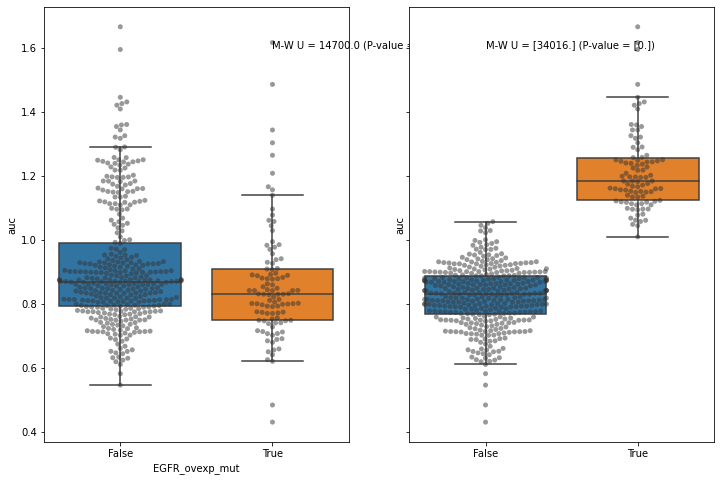

In [ ]:
fig, axarr = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(12, 8)

mwu, pval = mannwhitneyu(plotdata.loc[plotdata.EGFR_ovexp_mut, "auc"],
                         plotdata.loc[~plotdata.EGFR_ovexp_mut, "auc"], 
                         alternative="two-sided")
sns.boxplot(x="EGFR_ovexp_mut", y="auc", data=plotdata, fliersize=0, ax=axarr[0])
sns.swarmplot(x="EGFR_ovexp_mut", y="auc", data=plotdata, color=".2", alpha=0.5, ax=axarr[0])
axarr[0].text(1, 1.6, "M-W U = {} (P-value = {})".format(mwu, np.round(pval, 4)))

mwu2, pval2 = mannwhitneyu(target.loc[y_pred > 1],
                           target.loc[y_pred <= 1],
                           alternative="two-sided")
sns.boxplot(y_pred > 1, target.auc, fliersize=0, ax=axarr[1])
sns.swarmplot(y_pred > 1, target.auc, color=".2", alpha=0.5, ax=axarr[1])
axarr[1].text(0, 1.6, "M-W U = {} (P-value = {})".format(mwu2, np.round(pval2, 4)))

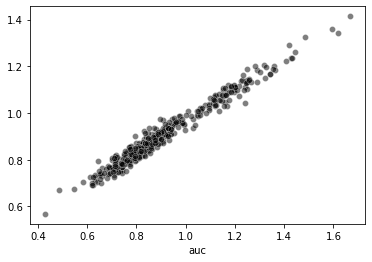

In [ ]:
sns.scatterplot(x=target.auc, y=y_pred, alpha=0.5, color="k")

**IMPORTANT: This plot does NOT mean your model is good. The model was trained on the same data we do prediction here. It can easily overfit and get perfect separation. To evaluate the model properly, you will need additional independent validation data to confirm the model generalizes well.**

## Project Achilles: genetic screening to identify sythetic lethality targets

RNA interfering (RNAi) and CRISPR-Cas9 screening is a powerful way to understanding cancer biology and identify possible target. [Project Achilles](https://depmap.org/portal/achilles) is one of such large-scale RNAi screening  aiming to identifying new cancer targets and oncogene dependencies in cancer. 

In this section, we will analyze the screening data from this project to validate how to connect this type of RNAi screening results to possible cancer target identifications.

As part of DepMap, you can find the genetic screening data here

[CRISPR_gene_effect.csv]

In [ ]:
achilles  = pd.read_csv(DATA / "CRISPR_gene_effect.csv", index_col=0)

# remove entrez ID from columns
achilles.columns = [x.split(" (")[0] for x in achilles.columns]

achilles.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL2,AADACL3,AADACL4,AADAT,AAED1,AAGAB,AAK1,AAMDC,AAMP,AANAT,AAR2,AARD,AARS,AARS2,AARSD1,AASDH,AASDHPPT,AASS,AATF,AATK,ABAT,ABCA1,ABCA10,ABCA12,ABCA13,ABCA2,ABCA3,ABCA4,ABCA5,ABCA6,ABCA7,ABCA8,ABCA9,ABCB1,ABCB10,ABCB11,ABCB4,ABCB5,ABCB6,ABCB7,...,ZNRF4,ZP1,ZP2,ZP3,ZP4,ZPBP,ZPBP2,ZPLD1,ZPR1,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN1,ZSCAN10,ZSCAN16,ZSCAN18,ZSCAN2,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN25,ZSCAN29,ZSCAN30,ZSCAN31,ZSCAN32,ZSCAN4,ZSCAN5A,ZSCAN9,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZSWIM8,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
DepMap_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACH-000001,-0.147896,0.054635,0.001420,-0.013390,-0.103499,-0.011259,0.006416,-0.313471,0.006769,0.066217,-0.208736,0.237325,0.256913,-0.285572,0.201421,-0.016604,-0.269917,-0.047291,-1.005527,-0.105756,0.046725,-0.077914,-1.964373,-0.756447,0.052875,-0.001457,-0.428739,0.058432,-0.477791,-0.057055,-0.106531,0.095076,-0.181614,-0.128019,0.023231,-0.082960,-0.078981,-0.474102,-0.082840,-0.216077,-0.039658,-0.105587,-0.008310,-0.259078,-0.294160,-0.006631,-0.027246,0.001602,0.024310,-0.522379,...,0.029244,-0.193006,-0.235936,-0.028684,0.027829,0.098378,-0.116132,-0.086621,-1.753719,-0.001903,-0.222934,0.002367,-1.785479,-0.092255,-0.138789,0.002820,-0.271717,0.028485,-0.145665,-0.022989,-0.168148,0.093477,-0.067787,-0.062430,0.042884,0.039984,-0.072494,-0.044409,0.135219,0.048978,0.132950,-0.024914,0.186642,-0.115573,0.072628,0.020650,-0.138485,-0.117248,-0.020035,-0.455263,-0.071027,-0.096538,-0.027838,0.109681,0.155383,-0.112082,0.085380,0.155184,0.063521,-0.330085
ACH-000004,0.042254,-0.037224,-0.110746,-0.012168,0.049287,-0.133418,0.146941,-0.205933,0.110355,0.145470,-0.037028,0.041376,0.212570,0.034831,0.223019,-0.031033,0.070911,-0.065311,-1.376893,-0.243097,-0.230334,0.006940,-1.657605,-0.373043,-0.133545,-0.004111,-0.375853,0.065701,-0.670142,0.051284,0.015498,0.060441,0.032584,0.007566,-0.009592,0.005089,-0.037314,-0.201603,0.123743,0.030488,0.086624,0.004382,0.081576,-0.012577,-0.209582,-0.169130,-0.052052,-0.123263,-0.031589,-1.356954,...,0.082482,-0.075304,-0.031325,-0.112866,-0.089761,0.083260,-0.008221,0.092601,-1.912074,0.002295,-0.107486,-0.061793,-1.211544,0.009256,0.059595,-0.063605,-0.053682,-0.168743,-0.065969,0.001548,-0.057859,0.089163,0.139221,-0.318032,0.169533,0.054962,-0.156545,0.149420,-0.323403,-0.014254,-0.362864,0.182972,-0.130115,0.137980,-0.144011,-0.068220,-0.026938,-0.062702,-0.099669,0.132946,-0.034566,-0.249427,0.108663,0.038576,0.056783,0.067128,-0.165622,0.127004,0.112793,-0.027449
ACH-000005,-0.097251,0.031381,0.056310,0.143841,-0.016917,-0.165130,0.129444,-0.258233,-0.078755,-0.004310,0.092431,0.194982,0.019189,-0.027686,0.127676,0.024084,-0.023857,-0.191566,-1.221108,-0.049423,-0.035612,0.085217,-2.004258,-0.252392,-0.177983,0.016356,-0.235865,0.073868,-0.778490,-0.019302,-0.191329,0.021901,-0.008658,0.032934,-0.109527,-0.047428,0.013401,-0.020933,0.039545,0.103693,-0.019025,0.124592,0.044800,-0.159804,-0.137113,-0.035015,-0.176014,-0.037525,-0.007680,-1.128792,...,0.245563,-0.512635,0.011095,-0.109658,-0.021184,0.015242,-0.148217,-0.032047,-1.571275,-0.025279,-0.427204,0.114637,-1.359127,0.020938,-0.062658,-0.026535,-0.060757,0.041947,-0.087390,-0.198573,0.005748,-0.002340,0.205246,-0.046565,0.110756,0.032131,-0.012039,0.173759,-0.160468,-0.022657,-0.017391,0.152465,-0.153351,-0.098978,-0.131453,0.027115,-0.208124,-0.147006,-0.234817,-0.090809,-0.078838,-0.247041,-0.045266,-0.004563,-0.025034,-0.124687,-0.119997,0.047233,-0.008179,-0.096007
ACH-000007,-0.021149,-0.083548,0.064541,0.072933,-0.021680,-0.038129,-0.019299,-0.207147,-0.065117,0.118090,-0.001388,0.031454,0.159903,-0.107807,-0.062474,0.027787,-0.104396,0.005222,-1.177282,0.038293,0.065382,0.001813,-2.023985,-0.361821,-0.123236,-0.181444,-0.530768,-0.024939,-0.990300,0.004765,0.077517,-0.082407,-0.

In this table, each row is a cellline, each column is a gene name. The values represent the viability score after the gene is knocked out. It's a relative score and does not have physical meaning. In general the lower the score meaning the cells cannot survive after the knockout.

In [ ]:
plotdata = achilles[["EGFR"]]
common_celllines = set(maf.DepMap_ID) & set(plotdata.index)
plotdata = plotdata.loc[list(common_celllines)]

egfr = maf[(maf.Hugo_Symbol == "EGFR") & maf.DepMap_ID.isin(common_celllines) &
           (maf.isDeleterious | (maf.Variant_annotation == "damaging") | maf.isCOSMIChotspot.astype(bool))]

plotdata["EGFR_mut"] = False
plotdata.loc[plotdata.index.to_series().isin(egfr.DepMap_ID), "EGFR_mut"] = True

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 53.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(1, -1.75, 'M-W U P-value = 0.926')

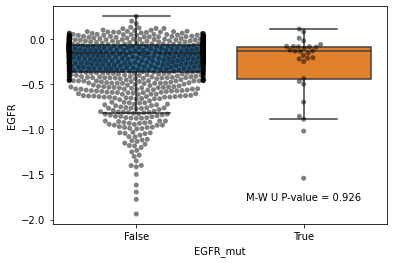

In [ ]:
from scipy.stats import mannwhitneyu
import seaborn as sns

mwu, pval = mannwhitneyu(plotdata.loc[plotdata.EGFR_mut, "EGFR"],
                         plotdata.loc[~plotdata.EGFR_mut, "EGFR"])
ax = sns.boxplot(x="EGFR_mut", y="EGFR", data=plotdata, fliersize=0)
ax = sns.swarmplot(x="EGFR_mut", y="EGFR", data=plotdata, color="k",
                  alpha=0.5, ax=ax)

ax.text(1, -1.75, "M-W U P-value = {}".format(np.round(pval, 4)), ha="center", va="center")

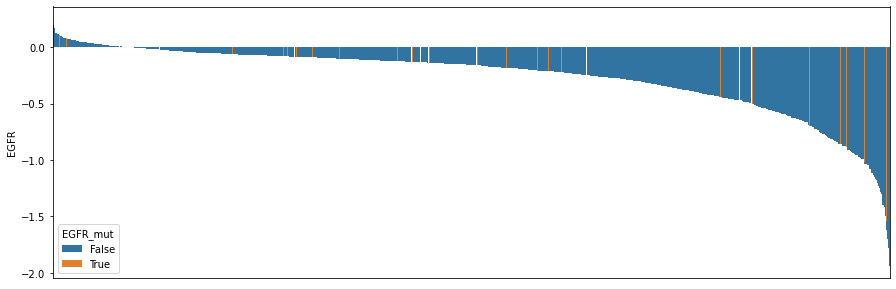

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.barplot(x=np.arange(len(plotdata)), y="EGFR", hue="EGFR_mut",
            data=plotdata.sort_values("EGFR", ascending=False), ax=ax, ci=None)
ax.set_xticklabels([])
ax.set_xticks([])
for bar in ax.patches:
    bar.set_width(1)

From the plot above, we can see that the EGFR-mutated cell lines doesn't necessarily lead to lethality after EGFR knockdown. This indicates the cell lines does not solely depend on EGFR per se for its survival. As we have seen previously by the fact that erlotinib doesn't targeting only EGFR mutated cell lines. 

Now let's check for another oncogene named [KRAS](https://en.wikipedia.org/wiki/KRAS). 

In [ ]:
plotdata = achilles[["KRAS"]]
common_celllines = set(maf.DepMap_ID) & set(plotdata.index)
plotdata = plotdata.loc[list(common_celllines)]

kras = maf[(maf.Hugo_Symbol == "KRAS") & maf.DepMap_ID.isin(common_celllines) &
           (maf.isDeleterious | (maf.Variant_annotation == "damaging") | maf.isCOSMIChotspot.astype(bool))]

plotdata["KRAS_mut"] = False
plotdata.loc[plotdata.index.to_series().isin(kras.DepMap_ID), "KRAS_mut"] = True

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 53.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(1, 0, 'M-W U P-value = 0.0')

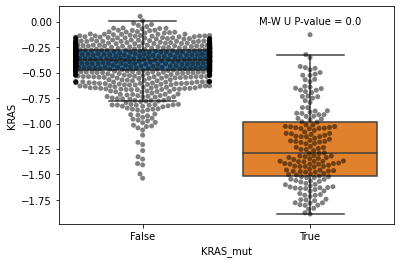

In [ ]:
from scipy.stats import mannwhitneyu
import seaborn as sns

mwu, pval = mannwhitneyu(plotdata.loc[plotdata.KRAS_mut, "KRAS"],
                         plotdata.loc[~plotdata.KRAS_mut, "KRAS"])
ax = sns.boxplot(x="KRAS_mut", y="KRAS", data=plotdata, fliersize=0)
ax = sns.swarmplot(x="KRAS_mut", y="KRAS", data=plotdata, color="k",
                  alpha=0.5, ax=ax)

ax.text(1, 0, "M-W U P-value = {}".format(np.round(pval, 4)), ha="center", va="center")

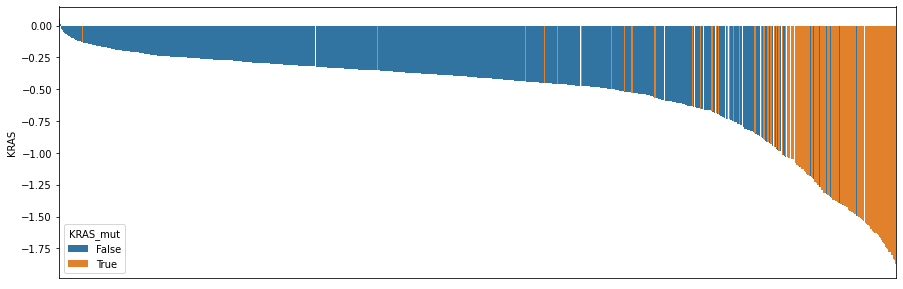

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.barplot(x=np.arange(len(plotdata)), y="KRAS", hue="KRAS_mut",
            data=plotdata.sort_values("KRAS", ascending=False), ax=ax, ci=None)
ax.set_xticklabels([])
ax.set_xticks([])
for bar in ax.patches:
    bar.set_width(1)

We can see the dependency of KRAS function is very obvious in the KRAS-mutated cell lines. Therefore, once KRAS is knocked out, the cell lines cannot survive. 

### Synthetic lethality testing

To identify synthetic lethality pairs, we can test for the inhibition of one gene leads to the lethal effect of cell lines with mutations in another gene. Here we will demonstrate another example of synthetic lethality pair: APC and CTNNB1.

[APC](https://en.wikipedia.org/wiki/Adenomatous_polyposis_coli#Mutations) is a gene often observed mutated in colon cancer. In the DRIVE project, it is observed that cell lines with such mutations exhibit high sensitivity to the inhibition of [CTNNB1](https://en.wikipedia.org/wiki/Beta-catenin#Involvement_in_cancer), or beta-catenin. Beta catenin is known to be mutated in several cancer types, the possible synthetic lethal relationship between these two genes indicates possible treatment strategy for colon cancer.

Below we investigate the association between cell viability when CTNNB1 is knocked out and the mutation status in APC gene.

In [ ]:
plotdata = achilles[["CTNNB1"]]
common_celllines = set(maf.DepMap_ID) & set(plotdata.index)
plotdata = plotdata.loc[list(common_celllines)]

apc = maf[(maf.Hugo_Symbol == "APC") & maf.DepMap_ID.isin(common_celllines) &
           (maf.isDeleterious | (maf.Variant_annotation == "damaging") | maf.isCOSMIChotspot.astype(bool))]

plotdata["APC_mut"] = False
plotdata.loc[plotdata.index.to_series().isin(apc.DepMap_ID), "APC_mut"] = True
# remove cell lines without CTNNB1 expression values
plotdata = plotdata.loc[~plotdata["CTNNB1"].isna()]


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(1, 0, 'M-W U P-value = 0.0')

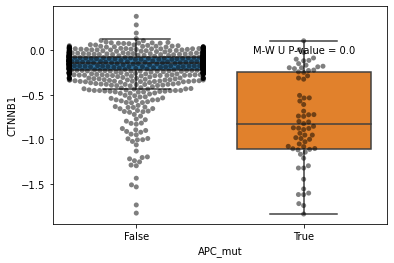

In [ ]:
from scipy.stats import mannwhitneyu
import seaborn as sns

mwu, pval = mannwhitneyu(plotdata.loc[plotdata.APC_mut, "CTNNB1"],
                         plotdata.loc[~plotdata.APC_mut, "CTNNB1"])
ax = sns.boxplot(x="APC_mut", y="CTNNB1", data=plotdata, fliersize=0)
ax = sns.swarmplot(x="APC_mut", y="CTNNB1", data=plotdata, color="k",
                  alpha=0.5, ax=ax)

ax.text(1, 0, "M-W U P-value = {}".format(np.round(pval, 4)), ha="center", va="center")

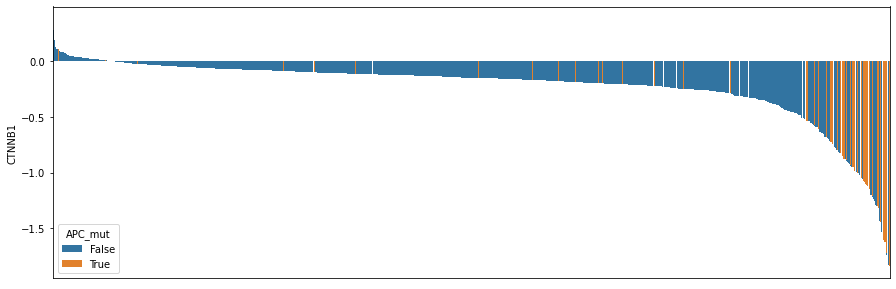

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.barplot(x=np.arange(len(plotdata)), y="CTNNB1", hue="APC_mut",
            data=plotdata.sort_values("CTNNB1", ascending=False), ax=ax, ci=None)
ax.set_xticklabels([])
ax.set_xticks([])
for bar in ax.patches:
    bar.set_width(1)